# Predicting Heart Disease using ML

This project looks into using various Python-based ML and data science librariers in an attempt to build a ML model capable of predicting whether or not someone has a heart disease based on their medical attributes.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation 

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

## 2. Data

Original data: UCI Machine Learning Repository (also available from Kaggle)

https://archive.ics.uci.edu/dataset/45/heart+disease
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

 ## 3. Evaluation

 > IF we can reach 95% accuracy at predicting wheter or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Different info about each of the features in the data.

**Data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Tools for data analysis and manipulation

In [5]:
# Importing all tools neded

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models for sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Loading the data

In [6]:
df = pd.read_csv('heart-disease.csv')
df.shape 

(303, 14)

### Data exploration (EDA)

**Goal**: find more about the data and become a subject matter expert on the dataset. 

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers?
5. Add/change/remove features to get more out of the data

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

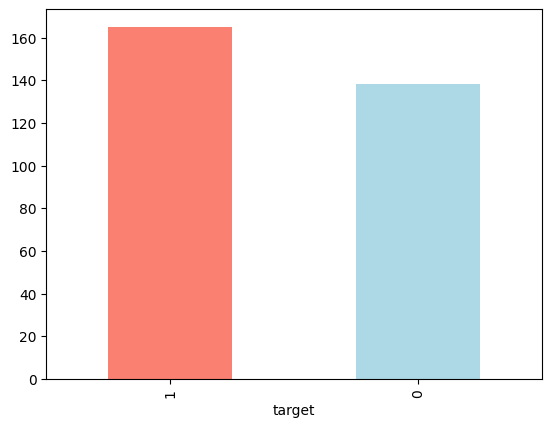

In [10]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to `sex`

In [16]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


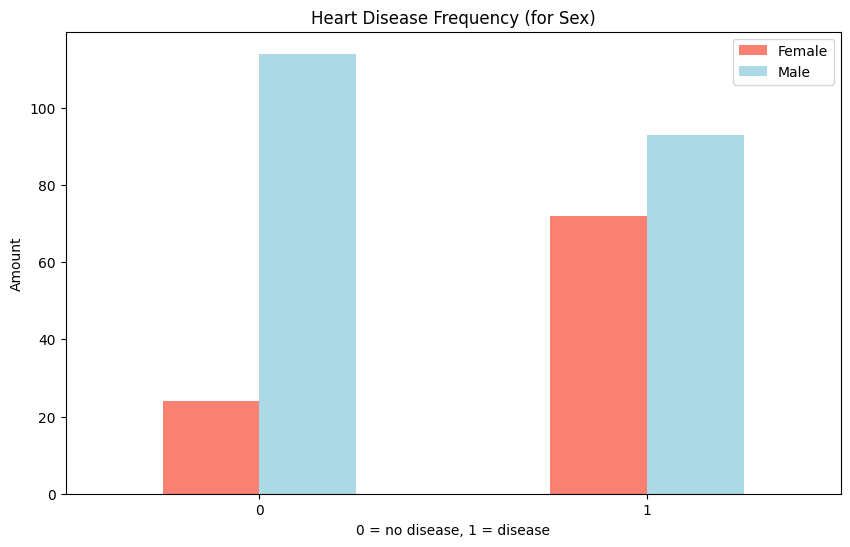

In [22]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue']);

plt.title('Heart Disease Frequency (for Sex)')
plt.xlabel('0 = no disease, 1 = disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation = 0);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max. Hearth Rate for Hearth Disease

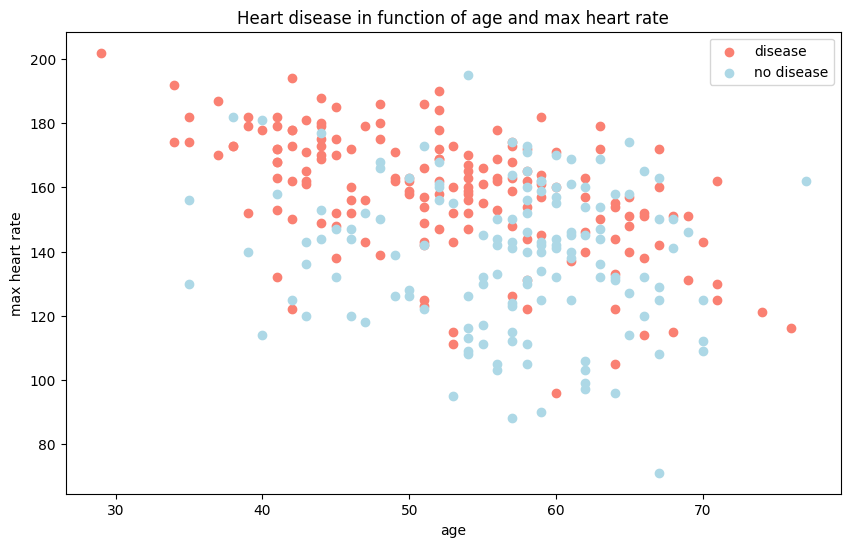

In [30]:
plt.figure(figsize = (10, 6))

# Positive examples
plt.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1], 
            c = 'salmon');

# Negative examples
plt.scatter(df.age[df.target == 0], 
            df.thalach[df.target == 0], 
            c = 'lightblue');

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease', 'no disease']);

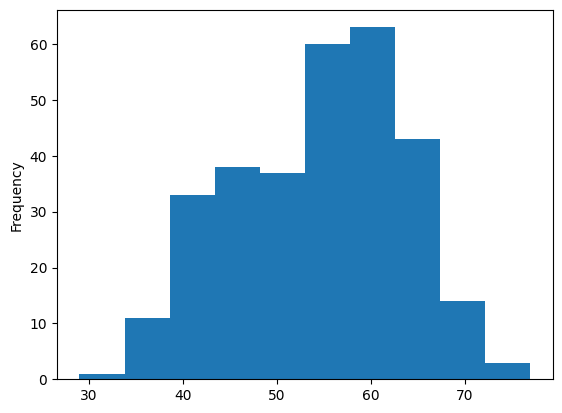

In [31]:
# Distribution of the age column
df.age.plot.hist();

### Heart Disease Freq per Chest Pain Type

cp - chest pain type 
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease

In [32]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


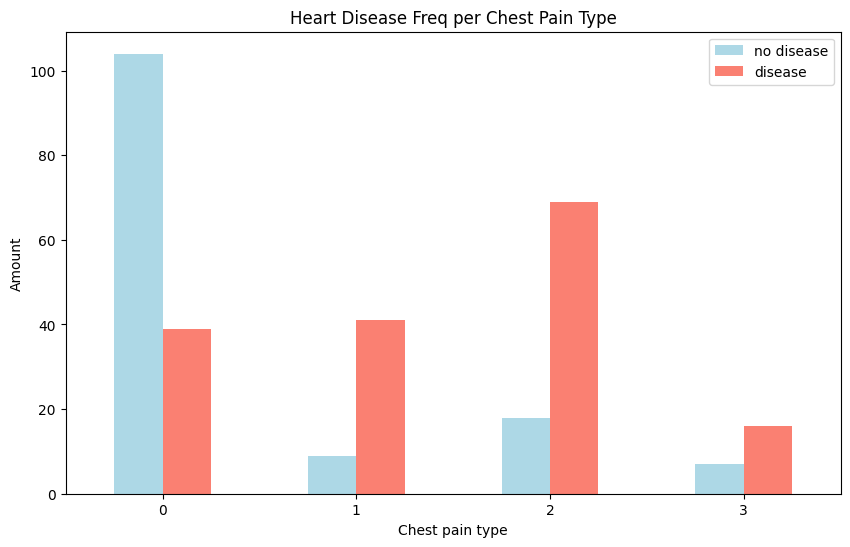

In [35]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', 
                                   figsize = (10, 6), 
                                   color = ['lightblue', 'salmon']);

plt.title('Heart Disease Freq per Chest Pain Type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation = 0);

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Building a corelation matrix 

In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


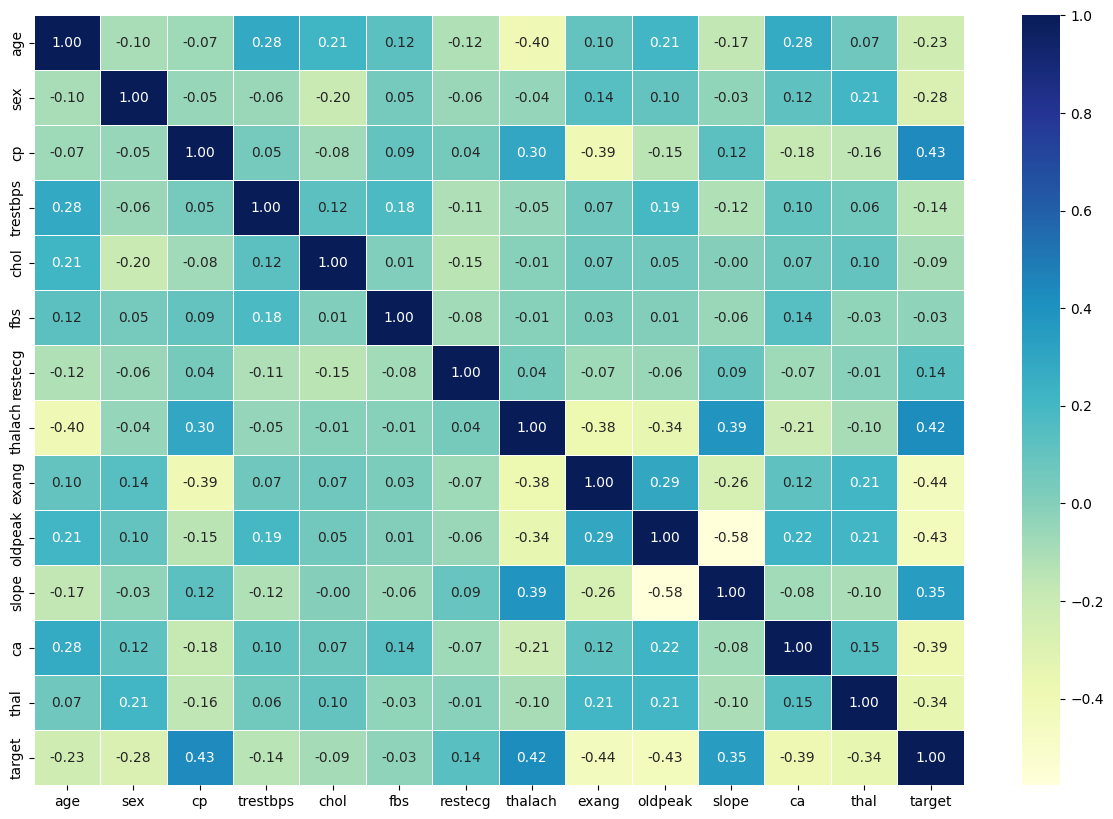

In [38]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot = True, 
                 linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu');

## 5. Modelling

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
X = df.drop('target', axis = 1)
y = df['target']

In [42]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [44]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [46]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Choosing the right model

We are going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [58]:
# Creating a dictionary to fit all models

models = {'Logistic Regression' : LogisticRegression(),
         'KNN' : KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models.
    models : a dict of different sklearn ML models
    '''
    np.random.seed(42)

    # Creating a dict to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [59]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\Fabius S Pop\Desktop\notebookFSP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

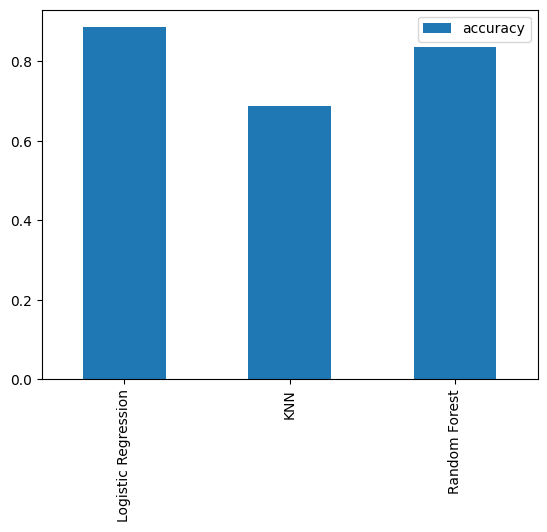

In [60]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])

model_compare.T.plot.bar();

**Ones to watch:**
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

#### Hyperparameter tuning

In [93]:
# Tuning KNN

train_scores = []
test_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1, 21)

# Setting up KNN instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors: 
    knn.set_params(n_neighbors = i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [94]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [95]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


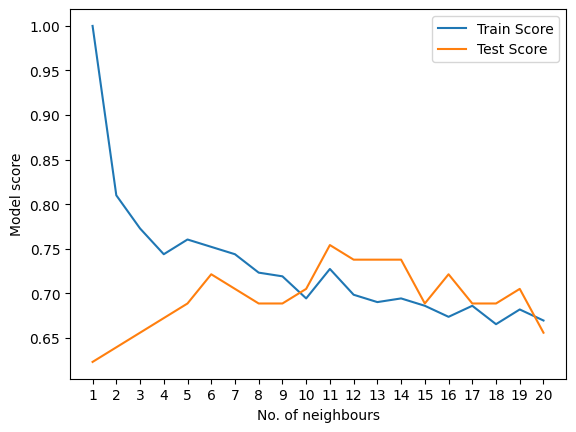

In [96]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('No. of neighbours')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

In [97]:
## Hyperparameter tuning with RandomizedSearchCV

We will tune:
* LogisticRegression()
* RandomForestClassifier()

using `RandomizedSearchCV`

In [107]:
# Creating a hyperparameter grid for LogisticRegression()
log_reg_grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators' : np.arange(10, 1000, 50),
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split' : np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1, 20, 2)
}

#### Tuning the hyperparams grids using RandomizedSearchCV

In [99]:
# Tuning Logistic Regression
np.random.seed(42)

# Set up random hyperparam search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [101]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [102]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuning RandomForestClassifier()

In [108]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperparam search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [109]:
# Best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [110]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

One may notice that there is an improvement.

Hyperparam tunin:
- by hand
- RandomizedSearchCV
- GridSearchCV

#### Hyperparam tuning using GridSearchCV

Since our LogisticRegression model provides the best score so far, we will try improve it using GridSearchCV

In [112]:
# Creating different hyperparams for our LogisticRegression model
log_reg_grid = {
    'C' : np.logspace(-4, 4, 30),
    'solver' : ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5, 
                         verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [113]:
# Best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [114]:
# Evaluating the Grid Search LogisticRegression() model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Cross-val should be used where possible.

In [115]:
# Make predictions (first) with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [116]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [117]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [119]:
# ROC curve
from sklearn.metrics import RocCurveDisplay 

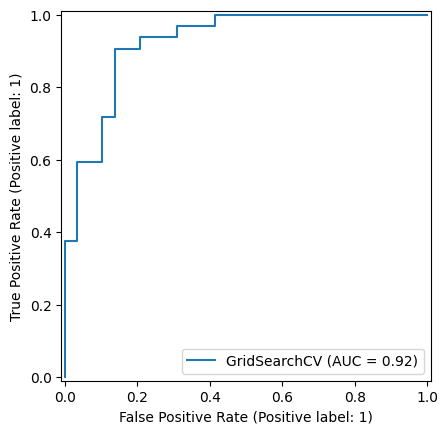

In [122]:
# Plotting the ROC curve and calculating AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [123]:
# Confusion Mx.
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


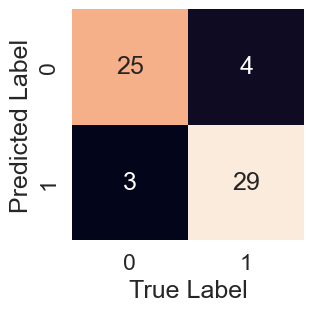

In [127]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a good loking confusion mx using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)

    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

#### Classification Report & Cross-validated precision, recall, f1-score

In [129]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculating the evaluation metrics using cross-validation
Calculating accuracy, precision, recall, f1-score
using `cross_val_score`

In [130]:
# Best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [132]:
# Creating a new classifier with the best params
clf = LogisticRegression(
    C = 0.20433597178569418,
    solver = 'liblinear'
)

In [155]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')

cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [156]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [157]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [158]:
# Cross-validated f1-score

In [159]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

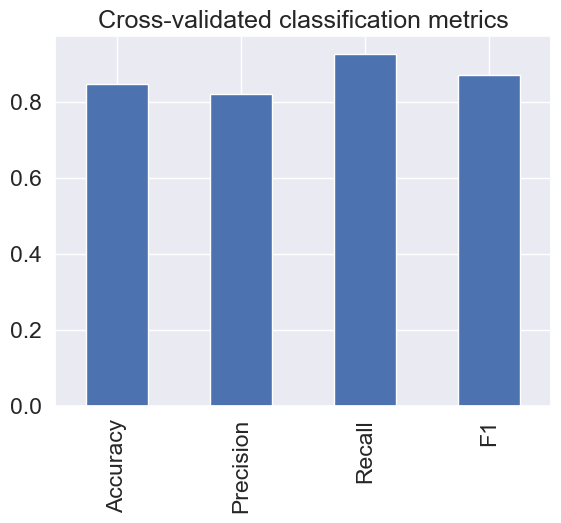

In [161]:
# Visualizing the cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                            'Precision' : cv_precision,
                            'Recall' : cv_recall,
                            'F1' : cv_f1}, 
                          index = [0])

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                     legend = False);

### Feature Importance

This is another way of asking which features contributed most to the outcomes of the model and how they contributed.

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Note: Finding feature importance is different for each ML model.

##### Finding the feature importance for the LogisticRegression model

In [164]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(
    C = 0.20433597178569418,
    solver = 'liblinear'
)

clf.fit(X_train, y_train);

In [165]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [167]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict
# We can see how much each feature contributes to predicting the target

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

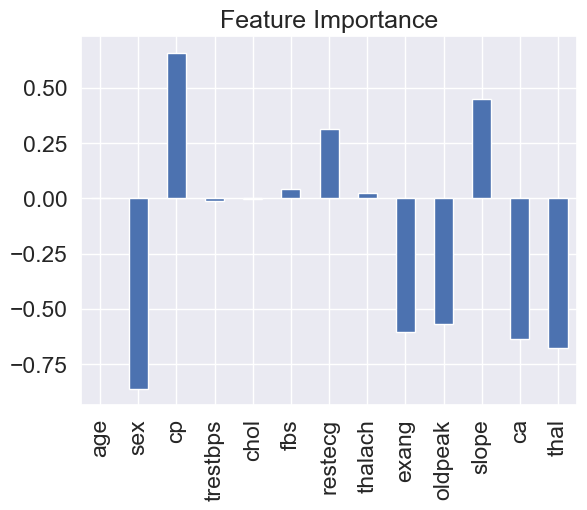

In [169]:
# Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

In [170]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

In [173]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Final Note:
* Could we colllect more data?
* Could we try a better model?
* Could we improve the current models?